In [1]:
import numpy as np
import pandas as pd
import math 
import matplotlib.pyplot as plt
import scipy
from sklearn.neighbors import KNeighborsClassifier
%matplotlib inline

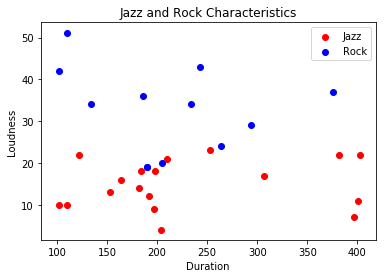

In [2]:
music = pd.DataFrame()

# Some data to play with.
music['duration'] = [184, 134, 243, 186, 122, 197, 294, 382, 102, 264, 
                     205, 110, 307, 110, 397, 153, 190, 192, 210, 403,
                     164, 198, 204, 253, 234, 190, 182, 401, 376, 102]
music['loudness'] = [18, 34, 43, 36, 22, 9, 29, 22, 10, 24, 
                     20, 10, 17, 51, 7, 13, 19, 12, 21, 22,
                     16, 18, 4, 23, 34, 19, 14, 11, 37, 42]

# We know whether the songs in our training data are jazz or not.
music['jazz'] = [ 1, 0, 0, 0, 1, 1, 0, 1, 1, 0,
                  0, 1, 1, 0, 1, 1, 0, 1, 1, 1,
                  1, 1, 1, 1, 0, 0, 1, 1, 0, 0]


# Look at our data.
plt.scatter(
    music[music['jazz'] == 1].duration,
    music[music['jazz'] == 1].loudness,
    color='red'
)
plt.scatter(
    music[music['jazz'] == 0].duration,
    music[music['jazz'] == 0].loudness,
    color='blue'
)
plt.legend(['Jazz', 'Rock'])
plt.title('Jazz and Rock Characteristics')
plt.xlabel('Duration')
plt.ylabel('Loudness')
plt.show()

The simplest form of a similarity model is the Nearest Neighbor model. This works quite simply: when trying to predict an observation, we find the closest (or _nearest_) known observation in our training data and use that value to make our prediction. Here we'll use the model as a classifier, the outcome of interest will be a category.

To find which observation is "nearest" we need some kind of way to measure distance. Typically we use _Euclidean distance_, the standard distance measure that you're familiar with from geometry. With one observation in n-dimensions $(x_1, x_2, ...,x_n)$ and the other $(w_1, w_2,...,w_n)$:

$$ \sqrt{(x_1-w_1)^2 + (x_2-w_2)^2+...+(x_n-w_n)^2} $$

You might recognize this formula, (taking distances, squaring them, adding the squares together, and taking the root) as a generalization of the [Pythagorean theorem](https://en.wikipedia.org/wiki/Pythagorean_theorem) into n-dimensions. You can technically define any distance measure you want, and there are times where this customization may be valuable. As a general standard, however, we'll use Euclidean distance.

Now that we have a distance measure from each point in our training data to the point we're trying to predict the model can find the datapoint with the smallest distance and then apply that category to our prediction.

Let's try running this model, using the SKLearn package.

In [10]:
neighbors = KNeighborsClassifier(n_neighbors=5)
X = music[['loudness', 'duration']]
Y = music.jazz
neighbors.fit(X,Y)

## Predict for a 24 loudness, 190 seconds long song.
print(neighbors.predict([[24, 190]]))
print(neighbors.predict_proba([[24, 190]]))

[1]
[[0.4 0.6]]


Now you've built a KNN model!

## Challenge: Implement the Nearest Neighbor algorithm 

The Nearest Neighbor algorithm is extremely simple. So simple, in fact, that you should be able to build it yourself from scratch using the Python you already know. Code a Nearest Neighbors algorithm that works for two dimensional data. You can use either arrays or dataframes to do this. Test it against the SKLearn package on the music dataset from above to ensure that it's correct. The goal here is to confirm your understanding of the model and continue to practice your Python skills. We're just expecting a brute force method here. After doing this, look up "ball tree" methods to see a more performant algorithm design.

In [11]:
class OwnKNeighborsClassifier():
    def __init__(self, n_neighbors):
        self.n_nb = n_neighbors
 
    def getNeighbors(self, testInstance):
        print(testInstance[0][0])
        k = self.n_nb
        self.model['loudness_dist'] = self.model['loudness'].copy()
        self.model['duration_dist'] = self.model['duration'].copy()
        self.model['loudness_dist'].apply(lambda x: pow((x - testInstance[0][0]), 2) )
        self.model['duration_dist'].apply(lambda x: pow((x - testInstance[0][1]), 2) )
        self.model['dist'] = self.model['loudness_dist'] + self.model['duration_dist']
        self.model['dist'].apply(lambda x: math.sqrt(x))
        return self.model.sort_values(by=['dist']).head(k)
   
    def fit(self, X, Y):
        self.model = pd.DataFrame()
        self.model = X.astype(float)
        self.model['Y'] = Y
           
    def predict(self, datapoint):
        nefds = self.getNeighbors(datapoint)
        print(nefds)
        return nefds['Y'].value_counts().idxmax()

In [12]:
own_KNN1 = OwnKNeighborsClassifier(n_neighbors=5)
print("k = ", own_KNN1.n_nb)
own_KNN1.fit(X,Y)
own_KNN1.predict([[24.0, 190.0]])

k =  5
24.0
    loudness  duration  Y  loudness_dist  duration_dist   dist
8       10.0     102.0  1           10.0          102.0  112.0
11      10.0     110.0  1           10.0          110.0  120.0
29      42.0     102.0  0           42.0          102.0  144.0
4       22.0     122.0  1           22.0          122.0  144.0
13      51.0     110.0  0           51.0          110.0  161.0


1